# AIDETIC Assessment for Data Engineer (PySpark 2024)

### Disaster Dataset Analysis

In [1]:
# Import Required Python libraries to run PySpark

import findspark
findspark.init('/home/k23/spark-3.5.0-bin-hadoop3')
from pyspark.sql import SparkSession

from pyspark.sql.functions import concat, col, lit, to_timestamp, avg, udf, when
from pyspark.sql.types import StringType, FloatType

import math
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Assessment Task 1 - Load the  dataset into a PySpark DataFrame.

In [2]:
# Initialized a Spark Session and created a data frame by reading data from csv file
spark = SparkSession.builder.appName("Aidetic_Assessment").getOrCreate()
df = spark.read.csv("database.csv", header=True)

# show only first 5 rows of data.
df.show(5)

24/02/07 22:03:35 WARN Utils: Your hostname, SparkVM resolves to a loopback address: 127.0.1.1; using 192.168.1.2 instead (on interface enp0s3)
24/02/07 22:03:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/07 22:03:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+----------+--------+--------+---------+----------+-----+-----------+----------------------+---------+--------------+---------------+--------------------------+-------------+-------------------+----------------+----------------+------------+------+---------------+----------------+---------+
|      Date|    Time|Latitude|Longitude|      Type|Depth|Depth Error|Depth Seismic Stations|Magnitude|Magnitude Type|Magnitude Error|Magnitude Seismic Stations|Azimuthal Gap|Horizontal Distance|Horizontal Error|Root Mean Square|          ID|Source|Location Source|Magnitude Source|   Status|
+----------+--------+--------+---------+----------+-----+-----------+----------------------+---------+--------------+---------------+--------------------------+-------------+-------------------+----------------+----------------+------------+------+---------------+----------------+---------+
|01/02/1965|13:44:18|  19.246|  145.616|Earthquake|131.6|       NULL|                  NULL|        6|            MW|       

In [3]:
# print schema of the data frame so that we understand how each column values are defined. i.e. data type, null values, etc
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Depth: string (nullable = true)
 |-- Depth Error: string (nullable = true)
 |-- Depth Seismic Stations: string (nullable = true)
 |-- Magnitude: string (nullable = true)
 |-- Magnitude Type: string (nullable = true)
 |-- Magnitude Error: string (nullable = true)
 |-- Magnitude Seismic Stations: string (nullable = true)
 |-- Azimuthal Gap: string (nullable = true)
 |-- Horizontal Distance: string (nullable = true)
 |-- Horizontal Error: string (nullable = true)
 |-- Root Mean Square: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Location Source: string (nullable = true)
 |-- Magnitude Source: string (nullable = true)
 |-- Status: string (nullable = true)



In above Scema we can see that the Data Type of "Date", "Time", "Magnitude", "Depth", "Latitutude", "Longitutde" columns is in string.

We have to convert its data type float or int so that we can carry out arithematic operations on these columns.

## Assessment Task 2 - Convert the Date and Time columns into a timestamp column named Timestamp.

In [4]:
# Created a seperate column "Timestamp", In this column we added concatinated values of Date and Time.
# As the values in Timestamp column are in string we used "to_timestamp" funcntion to convert values into a timestamp datatype.

df = df.withColumn("TimeStamp", concat(col("Date"), lit(" "), col("Time")))
df = df.withColumn("Timestamp", to_timestamp("Timestamp", "MM/dd/yyyy HH:mm:ss"))
df.show(5)

+----------+--------+--------+---------+----------+-----+-----------+----------------------+---------+--------------+---------------+--------------------------+-------------+-------------------+----------------+----------------+------------+------+---------------+----------------+---------+-------------------+
|      Date|    Time|Latitude|Longitude|      Type|Depth|Depth Error|Depth Seismic Stations|Magnitude|Magnitude Type|Magnitude Error|Magnitude Seismic Stations|Azimuthal Gap|Horizontal Distance|Horizontal Error|Root Mean Square|          ID|Source|Location Source|Magnitude Source|   Status|          Timestamp|
+----------+--------+--------+---------+----------+-----+-----------+----------------------+---------+--------------+---------------+--------------------------+-------------+-------------------+----------------+----------------+------------+------+---------------+----------------+---------+-------------------+
|01/02/1965|13:44:18|  19.246|  145.616|Earthquake|131.6|       

In [5]:
# We verified that the TimeStamp Column is now in correct format. which is in timestamp data type format.

df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Depth: string (nullable = true)
 |-- Depth Error: string (nullable = true)
 |-- Depth Seismic Stations: string (nullable = true)
 |-- Magnitude: string (nullable = true)
 |-- Magnitude Type: string (nullable = true)
 |-- Magnitude Error: string (nullable = true)
 |-- Magnitude Seismic Stations: string (nullable = true)
 |-- Azimuthal Gap: string (nullable = true)
 |-- Horizontal Distance: string (nullable = true)
 |-- Horizontal Error: string (nullable = true)
 |-- Root Mean Square: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Location Source: string (nullable = true)
 |-- Magnitude Source: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Timestamp: timestamp (nullable = true)



## Assessment Task 3 - Filter the dataset to include only earthquakes with a magnitude greater than 5.0

In [6]:
# we checked how many types of disasters are present in our data set
df.select('Type').distinct().show()

+-----------------+
|             Type|
+-----------------+
|        Explosion|
|       Rock Burst|
|Nuclear Explosion|
|       Earthquake|
+-----------------+



In [7]:
# As column Magnitude is in string format, We need to first convert it to float.
df = df.withColumn("Magnitude", col("Magnitude").cast("float"))

# using filtered out data records for earthquakes whose magnitude is greater than 5. used filter() method.
df = df.filter((df["Type"] == "Earthquake") & (df["Magnitude"] > 5.0))
df.show()

+----------+--------+--------+---------+----------+-----+-----------+----------------------+---------+--------------+---------------+--------------------------+-------------+-------------------+----------------+----------------+--------------------+---------+---------------+----------------+---------+-------------------+
|      Date|    Time|Latitude|Longitude|      Type|Depth|Depth Error|Depth Seismic Stations|Magnitude|Magnitude Type|Magnitude Error|Magnitude Seismic Stations|Azimuthal Gap|Horizontal Distance|Horizontal Error|Root Mean Square|                  ID|   Source|Location Source|Magnitude Source|   Status|          Timestamp|
+----------+--------+--------+---------+----------+-----+-----------+----------------------+---------+--------------+---------------+--------------------------+-------------+-------------------+----------------+----------------+--------------------+---------+---------------+----------------+---------+-------------------+
|01/02/1965|13:44:18|  19.246| 

## Assessment Task 4 - Calculate the average depth and magnitude of earthquakes for each earthquake type.

In [8]:
# As column Depth is in string format, We need to first convert it to float.

df = df.withColumn("Depth", col("Depth").cast("float"))

# use Aggregate function, Average.
avg_depth_magnitude = df.groupBy("Type").agg(avg("Depth").alias("Avg_Depth"), avg("Magnitude").alias("Avg_Magnitude"))
avg_depth_magnitude.show()


+----------+-----------------+-----------------+
|      Type|        Avg_Depth|    Avg_Magnitude|
+----------+-----------------+-----------------+
|Earthquake|71.31391348824346|5.882762548783101|
+----------+-----------------+-----------------+



## Assessment Task 5 - Implement a UDF to categorize the earthquakes into levels (e.g., Low, Moderate, High) based on their magnitudes.


In [9]:
# created a python function

def categorize_magnitude(magnitude):
    if magnitude < 6.0:
        return "Low"
    elif 6.0 <= magnitude < 8.0:
        return "Moderate"
    else:
        return "High"

In [10]:
# registered the above function as a UDF so that we can use it to process data per row of the dataframe.

categorize_magnitude_udf = udf(categorize_magnitude, StringType())

In [11]:
# below piece of code is parsing each record in dataframe through the UDF and creating a exttra column with the returned data.

df = df.withColumn("Magnitude_Level", categorize_magnitude_udf(df["Magnitude"]))

In [12]:
df.select(df["Type"],df["Magnitude"],df["Magnitude_Level"]).show(5)

+----------+---------+---------------+
|      Type|Magnitude|Magnitude_Level|
+----------+---------+---------------+
|Earthquake|      6.0|       Moderate|
|Earthquake|      5.8|            Low|
|Earthquake|      6.2|       Moderate|
|Earthquake|      5.8|            Low|
|Earthquake|      5.8|            Low|
+----------+---------+---------------+
only showing top 5 rows



In [13]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Depth: float (nullable = true)
 |-- Depth Error: string (nullable = true)
 |-- Depth Seismic Stations: string (nullable = true)
 |-- Magnitude: float (nullable = true)
 |-- Magnitude Type: string (nullable = true)
 |-- Magnitude Error: string (nullable = true)
 |-- Magnitude Seismic Stations: string (nullable = true)
 |-- Azimuthal Gap: string (nullable = true)
 |-- Horizontal Distance: string (nullable = true)
 |-- Horizontal Error: string (nullable = true)
 |-- Root Mean Square: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Location Source: string (nullable = true)
 |-- Magnitude Source: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Timestamp: timestamp (nullable = true)
 |-- Magnitude_Level: string (nullable = 

## Assessment Task 6 - Calculate the distance of each earthquake from a reference location (e.g., (0, 0)).

In [14]:
# reference latitude and longitude are as (0,0)

ref_latitude = 0.0
ref_longitude = 0.0

def calculate_distance(latitude, longitude):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(ref_latitude)
    lon1 = math.radians(ref_longitude)
    lat2 = math.radians(latitude)
    lon2 = math.radians(longitude)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance # returns data in KM distance

In [15]:
# register the function as an UDF and convert columns from string to float
calculate_distance_udf = udf(calculate_distance, FloatType())
df = df.withColumn("Latitude", col("Latitude").cast("float"))
df = df.withColumn("Longitude", col("Longitude").cast("float"))

In [16]:
# below piece of code is parsing each record in dataframe through the UDF and creating a exttra column with the returned data.
df = df.withColumn("Distance_from_Ref", calculate_distance_udf(df["Latitude"], df["Longitude"]))

In [17]:
df.select(df["Latitude"],df["Longitude"],df["Distance_from_Ref"]).show(5)

+--------+---------+-----------------+
|Latitude|Longitude|Distance_from_Ref|
+--------+---------+-----------------+
|  19.246|  145.616|        15698.798|
|   1.863|  127.352|        14158.326|
| -20.579| -173.972|         17634.75|
| -59.076|  -23.557|        6882.5195|
|  11.938|  126.427|        13956.939|
+--------+---------+-----------------+
only showing top 5 rows



## Assessment Task 7 - Visualize the geographical distribution of earthquakes on a world map using appropriate libraries (e.g., Basemap or Folium).

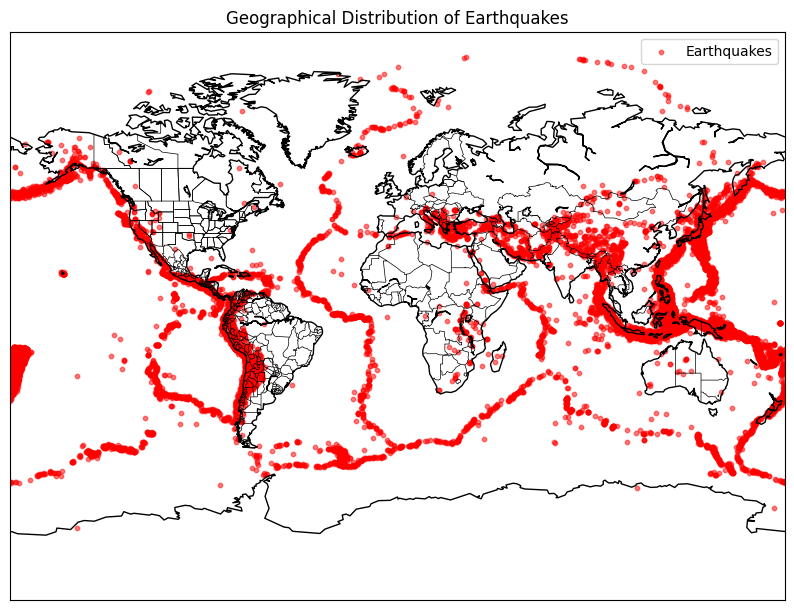

In [18]:
# using mattplotliib basemap library.

plt.figure(figsize=(10, 8))

# Create a Basemap instance for the world map
map = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines, countries, and states
map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Plot earthquakes, converted spark datafrane to pandas.
x, y = map(df.toPandas()['Longitude'], df.toPandas()['Latitude'])
map.scatter(x, y, s=10, c='r', marker='o', alpha=0.5, label='Earthquakes')

# Add title and legend
plt.title('Geographical Distribution of Earthquakes')
plt.legend()

# Show the plot
plt.show()

## Assessment Task 8 - Export the final Dataframe to csv file.

In [19]:
df.write.csv("Aidetic_Output.csv", header=True, mode="overwrite")

In [20]:
spark.stop()